In [ ]:
!pip install tensorflow

In [41]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np 

In [42]:
(X_train , y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [7]:
X_train.size

47040000

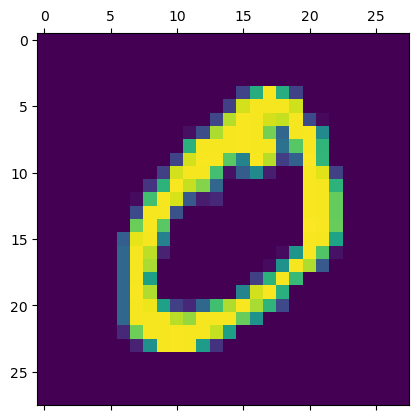

In [8]:
plt.matshow(X_train[1])

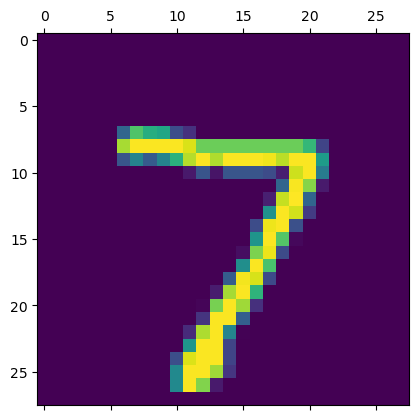

In [10]:
plt.matshow(X_test[0])

In [11]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train_flattened = X_train.reshape(len(X_train) , 28*28)
X_test_flattened = X_test.reshape(len(X_test) , 28*28)


In [22]:
len(X_train_flattened) , len(X_test_flattened)

(60000, 10000)

In [23]:
X_test_flattened.shape

(10000, 784)

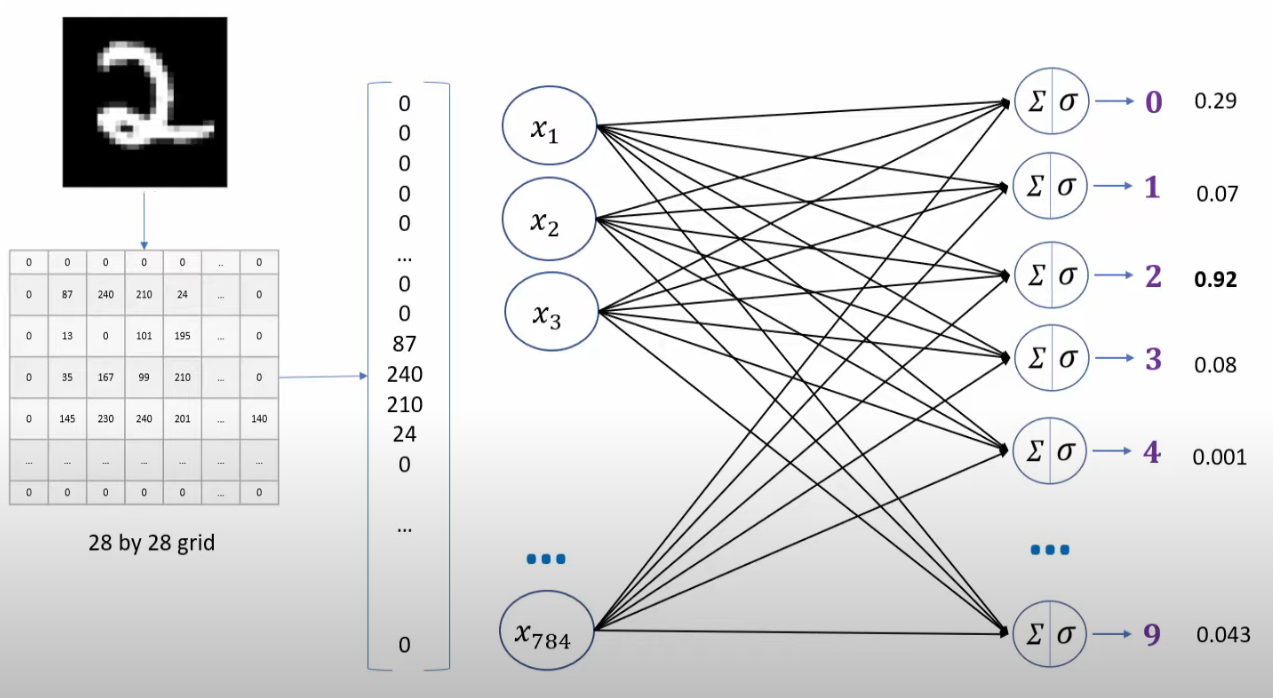

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10, activation = 'sigmoid')
    
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [26]:
model.fit(X_train_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 949us/step - loss: 0.2835 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 2s 873us/step - loss: 0.2731 - accuracy: 0.9239
Epoch 3/5
1875/1875 [==============================] - 2s 847us/step - loss: 0.2667 - accuracy: 0.9255
Epoch 4/5
1875/1875 [==============================] - 2s 855us/step - loss: 0.2620 - accuracy: 0.9275
Epoch 5/5
1875/1875 [==============================] - 2s 875us/step - loss: 0.2582 - accuracy: 0.9288


In [27]:
model.evaluate(X_test_flattened , y_test)

313/313 [==============================] - 1s 891us/step - loss: 0.2668 - accuracy: 0.9256


[0.2667894959449768, 0.925599992275238]

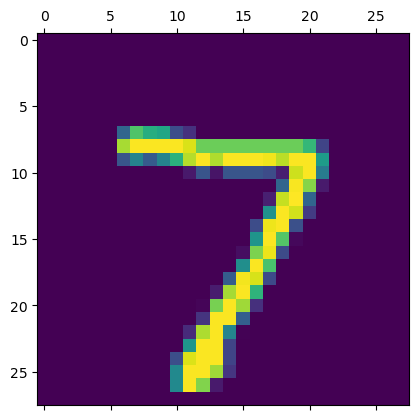

In [29]:
plt.matshow(X_test[0])

In [31]:
y_pred = model.predict(X_test_flattened)

y_pred[0]

313/313 [==============================] - 0s 747us/step


array([9.7553954e-03, 7.8355093e-08, 2.8076384e-02, 9.3501717e-01,
       1.6249942e-03, 1.2231696e-01, 2.1571611e-07, 9.9982411e-01,
       6.2686890e-02, 5.4963499e-01], dtype=float32)

In [32]:
np.argmax(y_pred[0])

7

In [33]:
Y_pred_labels = [np.argmax(i) for i in y_pred]

In [36]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=Y_pred_labels)

In [37]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    7,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,    9,  932,   12,   10,    5,   11,    9,   33,    4],
       [   5,    0,   21,  898,    1,   44,    2,   12,   19,    8],
       [   1,    2,    5,    1,  922,    0,    9,    4,    6,   32],
       [   8,    3,    5,   16,    9,  803,   10,    6,   26,    6],
       [  11,    3,    9,    1,    7,   17,  906,    2,    2,    0],
       [   1,    5,   24,    2,    7,    1,    0,  962,    2,   24],
       [   7,   13,    6,   16,    9,   46,    8,   13,  846,   10],
       [  11,    7,    1,    8,   32,    9,    0,   29,    3,  909]])>

<AxesSubplot:>

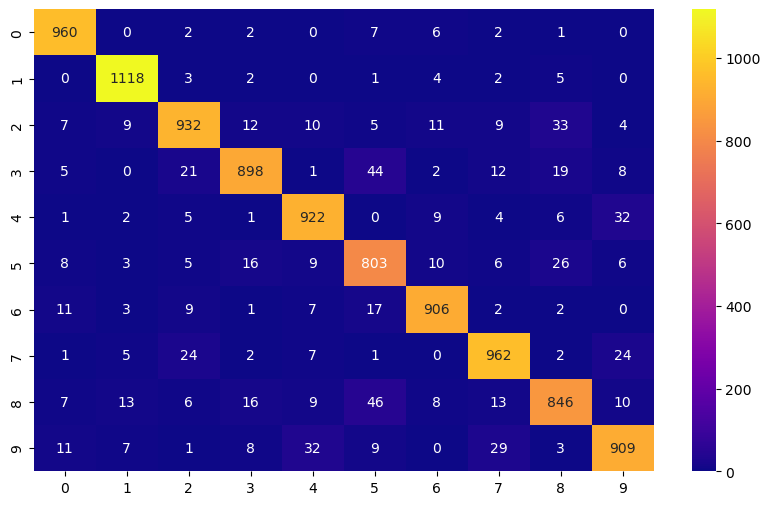

In [39]:
import seaborn as sns

plt.figure(figsize=(10,6))

sns.heatmap(cm , annot=True , fmt='d' , cmap='plasma')


In [51]:
model_without_flatten = keras.Sequential([

    keras.layers.Flatten(input_shape=(28,28)) , 
    keras.layers.Dense(20 , activation='relu'),
    keras.layers.Dense(10 , activation ='sigmoid')
])

model_without_flatten.compile(

    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model_without_flatten.fit(X_train , y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 942us/step - loss: 2.4795 - accuracy: 0.2599
Epoch 2/10
1875/1875 [==============================] - 2s 922us/step - loss: 1.4278 - accuracy: 0.4792
Epoch 3/10
1875/1875 [==============================] - 2s 945us/step - loss: 1.0230 - accuracy: 0.6442
Epoch 4/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.7049 - accuracy: 0.7845
Epoch 5/10
1875/1875 [==============================] - 2s 940us/step - loss: 0.6106 - accuracy: 0.8191
Epoch 6/10
1875/1875 [==============================] - 2s 931us/step - loss: 0.5624 - accuracy: 0.8393
Epoch 7/10
1875/1875 [==============================] - 2s 925us/step - loss: 0.5382 - accuracy: 0.8483
Epoch 8/10
1875/1875 [==============================] - 2s 936us/step - loss: 0.5238 - accuracy: 0.8527
Epoch 9/10
1875/1875 [==============================] - 2s 962us/step - loss: 0.5140 - accuracy: 0.8548
Epoch 10/10
1875/1875 [==============================] - 2s 941u

In [45]:
X_train.shape

(60000, 28, 28)